<a href="https://colab.research.google.com/github/IT19237114/ML_Assignment2_IT19135076_IT19237114_IT19092102_IT19148250/blob/IT19237114---FEATURE-ENGINEERING/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**



1.   Numpy

NumPy is a Python library used for working with arrays.

It also has functions for working in domain of linear algebra, fourier transform, and matrices.
2.   MathplotLib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

3.   Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

4.   Sklearn

free machine learning library for Python. It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries like NumPy and SciPy 


5. pandas
Pandas is a Python library for data analysis








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import metrics
from pandas.plotting import scatter_matrix


from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**IMPORT DATASET**

 imported the dataset from GitHub, which was available until the GitHub repo was terminated.

In [ ]:
!git clone https://github.com/IT19237114/ML_Assignment2_IT19135076_IT19237114_IT19092102_IT19148250

Cloning into 'ML_Assignment2_IT19135076_IT19237114_IT19092102_IT19148250'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 106 (delta 2), reused 0 (delta 0), pack-reused 94
Receiving objects: 100% (106/106), 854.28 KiB | 5.62 MiB/s, done.
Resolving deltas: 100% (54/54), done.


**Read Dataset Using panda library**

In [ ]:
salary_data = pd.read_csv('/content/ML_Assignment2_IT19135076_IT19237114_IT19092102_IT19148250/salary.csv')

# **Data Analsyis & Data pre possesing**

In [ ]:
#load data
salary_data




,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#display data set info
salary_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#display null value if any
salary_data.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


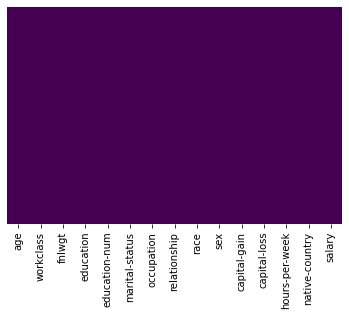

In [ ]:
#full data set cannont be viewed in isnull() function to overcome this issue we have used seaborn library to plot it in grapical way
sns.heatmap(salary_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [ ]:
#check salary is null
salary_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
#description based on statics value
salary_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#Finding the special characters in the data frame 
salary_data.isin([" ?"]).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

there some variable with missing character which have as ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


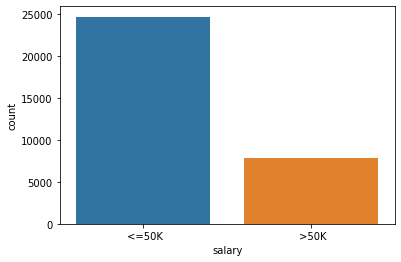

In [ ]:
#check  salary count
sns.countplot('salary',data=salary_data)


So far accoriding to our data analsing we can come to a statement that our data set does not contain any null value
most of the people are getting salry less than 50K 
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


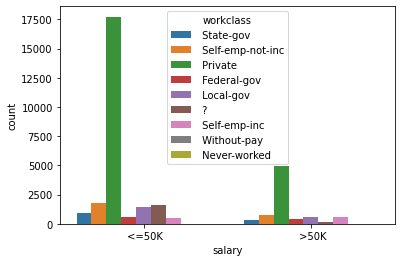

In [ ]:
#compare salary with other atribute

#salary with workclass
sns.countplot('salary',hue='workclass',data=salary_data)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


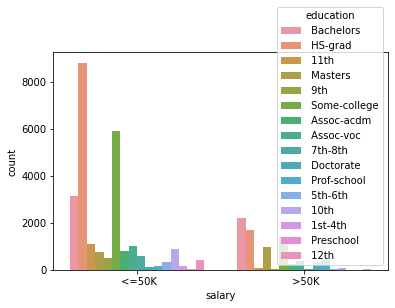

In [ ]:
#salary with education
sns.countplot('salary',hue='education',data=salary_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


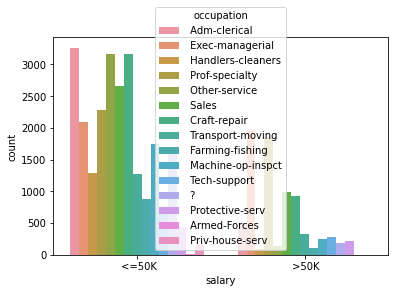

In [ ]:
#salary with occupation
sns.countplot('salary',hue='occupation',data=salary_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


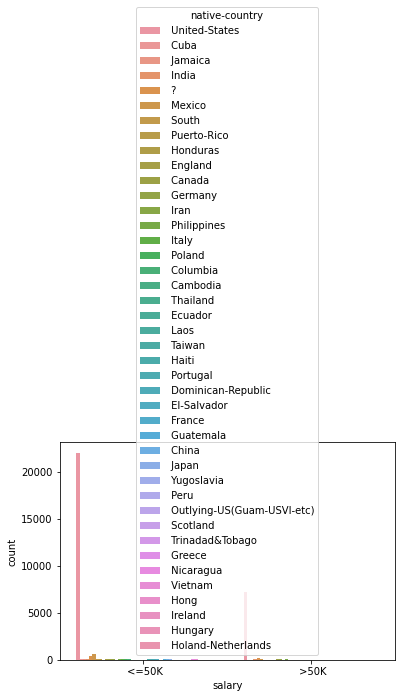

In [ ]:
#salary with native-country
sns.countplot('salary',hue='native-country',data=salary_data)

# **DATA CLEANING**

In [ ]:
#check special character sum
salary_data.isin([" ?"]).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

Having special characters in the data is not advisable because this may lead to incorrect data analysis and prediction models. So, we need to get rid of them. To achieve that we can leverage the libraries as shown below.

In [ ]:
# code will replace the special character to nan and then drop the columns 
salary_data['native-country'] = salary_data['native-country'].replace(' ?',np.nan)
salary_data['workclass'] = salary_data['workclass'].replace(' ?',np.nan)
salary_data['occupation'] = salary_data['occupation'].replace(' ?',np.nan)
#dropping the NaN rows now 
salary_data.dropna(how='any',inplace=True)

In [ ]:
#test
salary_data.isin([" ?"]).sum(axis=0)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
salary_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
salary_data.shape


(30162, 15)

initially we had  32562 rows with special character for our ml purpose we have droped some of the rows

# **Feature Engineering**

Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. Some of the data provided are Categorical data like WorkClass, Education, Marital-Status, Occupation, Relationship, etc. we need to convert these into numerical notations.

In [ ]:
#running a loop of value_counts of each column to find out unique values. 
for c in salary_data.columns:
    print ("######### %s #######" % c)
    print (salary_data[c].value_counts())
    #print salary


######### age #######
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
######### workclass #######
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
######### fnlwgt #######
203488    13
123011    12
113364    12
164190    12
121124    12
          ..
275818     1
318082     1
138342     1
158040     1
201490     1
Name: fnlwgt, Length: 20263, dtype: int64
######### education #######
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool       

In [ ]:
#dropping based on uniquness of data from the dataset 
salary_data.drop(['education-num','age', 'hours-per-week', 'fnlwgt', 'capital-gain','capital-loss', 'native-country'], axis=1, inplace=True)

In [ ]:
salary_data

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K


our final column type are


1.   workclass
2.   education
3.   relationship



In [ ]:
#mapping the salary into numerical data using map function
salary_data['salary'] = salary_data['salary'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [ ]:
salary_data

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0


In [ ]:
#replacing some special character columns names with proper names 
salary_data.rename(columns={ 'native-country': 'country','marital-status': 'marital','sex': 'gender'}, inplace=True)
salary_data.columns

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'gender', 'salary'],
      dtype='object')

In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0


In [ ]:
salary_data['gender'] = salary_data['gender'].map({' Male': 0, ' Female': 1}).astype(int)

In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,0,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,0,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,0,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,1,0
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,1,0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,0,1
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,1,0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,0,0


In [ ]:
salary_data['race'] = salary_data['race'].map({' Black': 0, ' Asian-Pac-Islander': 1,                     ' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)

In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,3,0,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,3,0,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,3,0,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,0,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0,1,0
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,3,1,0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,3,0,1
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,3,1,0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,3,0,0


In [ ]:
salary_data['marital'] = salary_data['marital'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,State-gov,Bachelors,5,Adm-clerical,Not-in-family,3,0,0
1,Self-emp-not-inc,Bachelors,2,Exec-managerial,Husband,3,0,0
2,Private,HS-grad,4,Handlers-cleaners,Not-in-family,3,0,0
3,Private,11th,2,Handlers-cleaners,Husband,0,0,0
4,Private,Bachelors,2,Prof-specialty,Wife,0,1,0
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,2,Tech-support,Wife,3,1,0
32557,Private,HS-grad,2,Machine-op-inspct,Husband,3,0,1
32558,Private,HS-grad,1,Adm-clerical,Unmarried,3,1,0
32559,Private,HS-grad,5,Adm-clerical,Own-child,3,0,0


In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,State-gov,Bachelors,5,Adm-clerical,Not-in-family,3,0,0
1,Self-emp-not-inc,Bachelors,2,Exec-managerial,Husband,3,0,0
2,Private,HS-grad,4,Handlers-cleaners,Not-in-family,3,0,0
3,Private,11th,2,Handlers-cleaners,Husband,0,0,0
4,Private,Bachelors,2,Prof-specialty,Wife,0,1,0
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,2,Tech-support,Wife,3,1,0
32557,Private,HS-grad,2,Machine-op-inspct,Husband,3,0,1
32558,Private,HS-grad,1,Adm-clerical,Unmarried,3,1,0
32559,Private,HS-grad,5,Adm-clerical,Own-child,3,0,0


In [ ]:
salary_data['workclass'] = salary_data['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6}).astype(int)

In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,1,Bachelors,5,Adm-clerical,Not-in-family,3,0,0
1,6,Bachelors,2,Exec-managerial,Husband,3,0,0
2,5,HS-grad,4,Handlers-cleaners,Not-in-family,3,0,0
3,5,11th,2,Handlers-cleaners,Husband,0,0,0
4,5,Bachelors,2,Prof-specialty,Wife,0,1,0
...,...,...,...,...,...,...,...,...
32556,5,Assoc-acdm,2,Tech-support,Wife,3,1,0
32557,5,HS-grad,2,Machine-op-inspct,Husband,3,0,1
32558,5,HS-grad,1,Adm-clerical,Unmarried,3,1,0
32559,5,HS-grad,5,Adm-clerical,Own-child,3,0,0


In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   workclass     30162 non-null  int64 
 1   education     30162 non-null  object
 2   marital       30162 non-null  int64 
 3   occupation    30162 non-null  object
 4   relationship  30162 non-null  object
 5   race          30162 non-null  int64 
 6   gender        30162 non-null  int64 
 7   salary        30162 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 2.1+ MB


Testing for merge

In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,1,Bachelors,5,Adm-clerical,Not-in-family,3,0,0
1,6,Bachelors,2,Exec-managerial,Husband,3,0,0
2,5,HS-grad,4,Handlers-cleaners,Not-in-family,3,0,0
3,5,11th,2,Handlers-cleaners,Husband,0,0,0
4,5,Bachelors,2,Prof-specialty,Wife,0,1,0
...,...,...,...,...,...,...,...,...
32556,5,Assoc-acdm,2,Tech-support,Wife,3,1,0
32557,5,HS-grad,2,Machine-op-inspct,Husband,3,0,1
32558,5,HS-grad,1,Adm-clerical,Unmarried,3,1,0
32559,5,HS-grad,5,Adm-clerical,Own-child,3,0,0


In [ ]:
salary_data['education'] = salary_data['education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15}).astype(int)

In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,1,12,5,Adm-clerical,Not-in-family,3,0,0
1,6,12,2,Exec-managerial,Husband,3,0,0
2,5,3,4,Handlers-cleaners,Not-in-family,3,0,0
3,5,11,2,Handlers-cleaners,Husband,0,0,0
4,5,12,2,Prof-specialty,Wife,0,1,0
...,...,...,...,...,...,...,...,...
32556,5,9,2,Tech-support,Wife,3,1,0
32557,5,3,2,Machine-op-inspct,Husband,3,0,1
32558,5,3,1,Adm-clerical,Unmarried,3,1,0
32559,5,3,5,Adm-clerical,Own-child,3,0,0


In [ ]:
salary_data['relationship'] = salary_data['relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5}).astype(int)

In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,1,12,5,Adm-clerical,0,3,0,0
1,6,12,2,Exec-managerial,4,3,0,0
2,5,3,4,Handlers-cleaners,0,3,0,0
3,5,11,2,Handlers-cleaners,4,0,0,0
4,5,12,2,Prof-specialty,1,0,1,0
...,...,...,...,...,...,...,...,...
32556,5,9,2,Tech-support,1,3,1,0
32557,5,3,2,Machine-op-inspct,4,3,0,1
32558,5,3,1,Adm-clerical,3,3,1,0
32559,5,3,5,Adm-clerical,5,3,0,0


In [ ]:
salary_data['occupation'] = salary_data['occupation'].map({ ' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, ' Handlers-cleaners': 4, 
' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8,' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, 
' Armed-Forces': 12, ' Other-service': 13,' Protective-serv':14}).astype(int)

In [ ]:
salary_data

,workclass,education,marital,occupation,relationship,race,gender,salary
0,1,12,5,3,0,3,0,0
1,6,12,2,7,4,3,0,0
2,5,3,4,4,0,3,0,0
3,5,11,2,4,4,0,0,0
4,5,12,2,5,1,0,1,0
...,...,...,...,...,...,...,...,...
32556,5,9,2,2,1,3,1,0
32557,5,3,2,6,4,3,0,1
32558,5,3,1,3,3,3,1,0
32559,5,3,5,3,5,3,0,0


# **Data Visualization** 

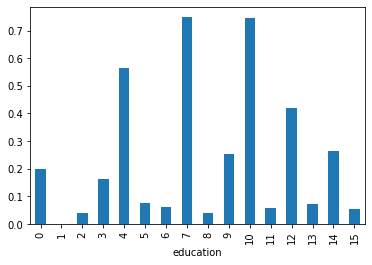

In [ ]:
salary_data.groupby('education').salary.mean().plot(kind='bar')

In this comparison in data visualization, we can see that number 7 which is prof-school and number 10 doctorate educated people has the highest salary and the least is number 1 which is preschool educated people 

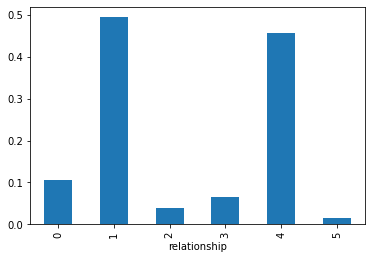

In [ ]:
salary_data.groupby('relationship').salary.mean().plot(kind='bar')

In this graph we are comparing and finding the relationship between salary and relationship. number 1 is wife, number 4 is husband. that both category gets the highest salary and number 5 which is kid where he/she dont have a salary

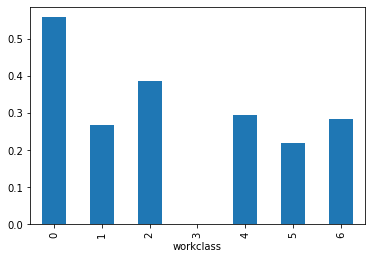

In [ ]:
salary_data.groupby('workclass').salary.mean().plot(kind='bar')

In this graph we are comparing the relationship between salary and workclass. As it indicates we can see self employee companies which is denoted by 1 has a greater salary and number 2 federal government has a highest number of salaries.

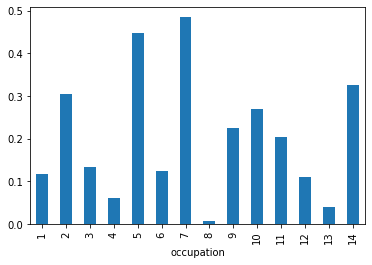

In [ ]:
salary_data.groupby('occupation').salary.mean().plot(kind='bar')

This graph shows the relationship between salary and occupation. Executive managerial post gets the highest salary which is denoted by the number 7 and professionally qualified people gets the second best salary which is denoted by the number 5 and house serving people gets the least salary which is denoted by number 8. 

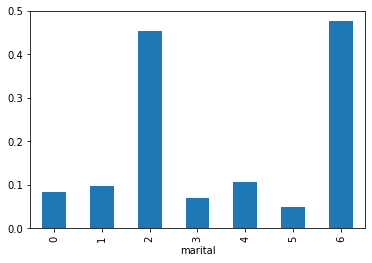

In [ ]:
salary_data.groupby('marital').salary.mean().plot(kind='bar')
#marriage data

This graph indicates the relation between salary and marital status. In this graph married-af-spouse which is denoted by number 6 gets the highest salary and married-civ-spouse gets the second best salary when compared to others. and also people who are never married which is denoted by the number 5 gets the least salary. 

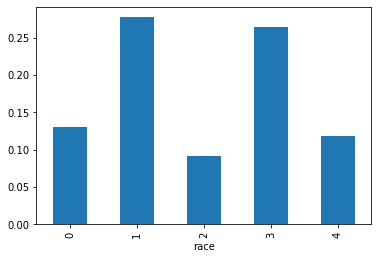

In [ ]:
salary_data.groupby('race').salary.mean().plot(kind='bar')

This graph shows the relationship between salary and their race. Asian-pac-Islander people gets the highest salary which is denoted by number 1 and white people gets the next best salary which is denoted by 2. 

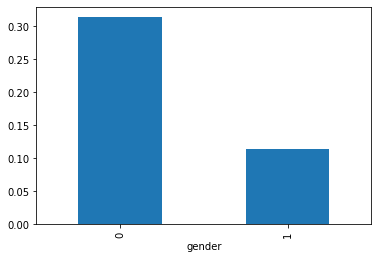

In [ ]:
salary_data.groupby('gender').salary.mean().plot(kind='bar')

In this graph we are indicating which gender takes the highest salary. Men takes the highest salary ( men : 0) when compared to women which is indicated by 1.

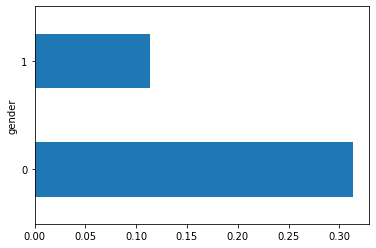

In [ ]:
salary_data.groupby('gender').salary.mean().plot(kind='barh')

This is the just a  visualization to get a better view of which gender gets the more income. (men : 0, women : 1)

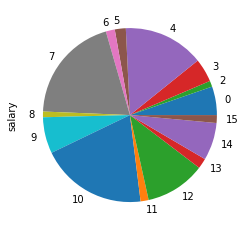

In [ ]:
salary_data.groupby('education').salary.mean().plot(kind='pie')

this is also a pie chart visualization to get a better view of which educated sector gets highest salary. (prof-school : 7, doctorate : 10)


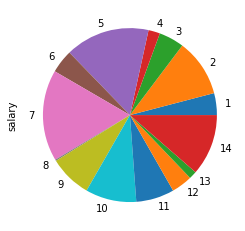

In [ ]:
salary_data.groupby('occupation').salary.mean().plot(kind='pie')

# **Data prediction**

In [ ]:

df_x = pd.DataFrame(np.c_[salary_data['relationship'], salary_data['education'], salary_data['race'],salary_data['occupation'],salary_data['gender'],salary_data['marital'],salary_data['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])

df_y = pd.DataFrame(salary_data.salary)

In [ ]:

reg = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [ ]:

reg = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [ ]:

reg = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [ ]:

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#feeding the predict function with our test values in the format 
#[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.749146071930882


In [ ]:
prediction=reg.predict([[1,7,3,7,0,2,0]])
if prediction:1
   print("above 50K")

IndentationError: ignored